# Imports

In [1]:
import cv2
import numpy as np
import tensorflow as tf

import keras
from keras import layers
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


# Simple DNN

In [2]:
inputs = keras.Input(shape=(784,))
inputs.shape

TensorShape([Dimension(None), Dimension(784)])

In [3]:
inputs.dtype

tf.float32

In [4]:
dense = layers.Dense(64, activation='relu')
x = dense(inputs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

In [6]:
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [7]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


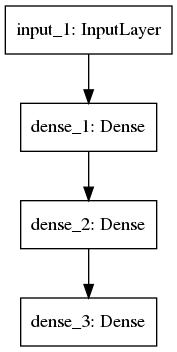

In [8]:
keras.utils.plot_model(model, 'simple_mnist_dnn.png')

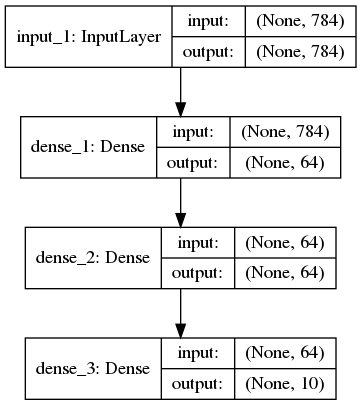

In [9]:
keras.utils.plot_model(model, 'simple_mnist_dnn_with_shape.png', show_shapes=True)

# Train Model

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [12]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=['acc']
)

In [13]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 47us/step - loss: 0.3338 - acc: 0.9046 - val_loss: 0.1745 - val_acc: 0.9487
Epoch 2/5
48000/48000 [==============================] - 2s 41us/step - loss: 0.1576 - acc: 0.9525 - val_loss: 0.1425 - val_acc: 0.9586
Epoch 3/5
48000/48000 [==============================] - 2s 43us/step - loss: 0.1166 - acc: 0.9649 - val_loss: 0.1286 - val_acc: 0.9608
Epoch 4/5
48000/48000 [==============================] - 2s 42us/step - loss: 0.0924 - acc: 0.9720 - val_loss: 0.1088 - val_acc: 0.9676
Epoch 5/5
48000/48000 [==============================] - 2s 41us/step - loss: 0.0780 - acc: 0.9767 - val_loss: 0.1203 - val_acc: 0.9679


# Evalutate Model

In [14]:
results = model.evaluate(x_test, y_test, verbose=2)

In [15]:
print('Test Loss:', results[0])
print('Test Accuracy:', results[1])

Test Loss: 0.1117389405587688
Test Accuracy: 0.9684000015258789


# Save and Serialize

In [16]:
model.save('simple_mnist_dnn.h5')
del model

In [17]:
model = keras.models.load_model('simple_mnist_dnn.h5')

# Reuse Layer Graph

### Autoencoder Version 1

In [18]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')

x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)

x = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)

encoder_output = layers.GlobalMaxPooling2D()(x)

In [19]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

In [20]:
x = layers.Reshape((4, 4, 1))(encoder_output)

x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)

x = layers.UpSampling2D(3)(x)

x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder_output = (x)

In [21]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                

### Autoencoder Version 2

In [22]:
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')

x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)

x = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)

encoder_output = layers.GlobalMaxPooling2D()(x)

In [23]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 16)                0   

In [24]:
decoder_input = keras.Input(shape=(16,), name="encoded_img")

x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)

decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

In [25]:
decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_img (InputLayer)     (None, 16)                0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 28, 28, 1)         145 

In [26]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')

encoded_image = encoder(autoencoder_input)
decoded_image = decoder(encoded_image)

autoencoder = keras.Model(autoencoder_input, decoded_image, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 16)                18672     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 44us/step - loss: 0.0662 - acc: 0.9801 - val_loss: 0.1121 - val_acc: 0.9693
Epoch 2/5
48000/48000 [==============================] - 2s 39us/step - loss: 0.0574 - acc: 0.9829 - val_loss: 0.1143 - val_acc: 0.9705
Epoch 3/5
48000/48000 [==============================] - 2s 39us/step - loss: 0.0512 - acc: 0.9847 - val_loss: 0.1032 - val_acc: 0.9711
Epoch 4/5
48000/48000 [==============================] - 2s 39us/step - loss: 0.0438 - acc: 0.9871 - val_loss: 0.1114 - val_acc: 0.9709
Epoch 5/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.0391 - acc: 0.9883 - val_loss: 0.1189 - val_acc: 0.9712


In [28]:
results = model.evaluate(x_test, y_test, verbose=2)

print('Test Loss:', results[0])
print('Test Accuracy:', results[1])

Test Loss: 0.1048600149544509
Test Accuracy: 0.9726999998092651


In [29]:
test_images = [img for img in x_test[:5]]    
test_labels = [lbl for lbl in y_test[:5]]

test_images = np.array(test_images)
test_labels = np.array(test_labels)

predictions = model.predict(test_images)

In [30]:
predictions.shape

(5, 10)

In [31]:
guess = np.argmax(predictions[0])

print('Predicted:', guess)
print('Actual:', test_labels[0])

Predicted: 7
Actual: 7


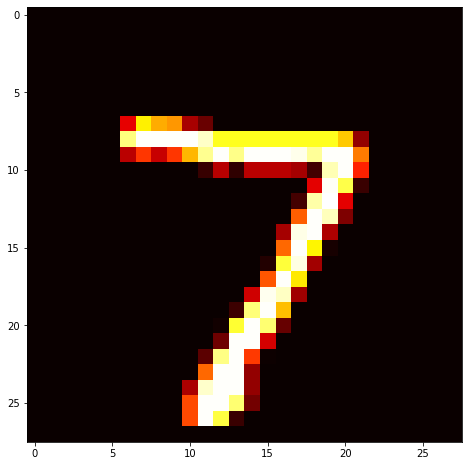

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

ax.imshow(test_images[0].reshape(28, 28), cmap='hot')

# Ensembling

In [33]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

In [34]:
model_1 = get_model()
model_2 = get_model()
model_3 = get_model()

In [35]:
inputs = keras.Input(shape=(128,))

y1 = model_1(inputs)
y2 = model_2(inputs)
y3 = model_3(inputs)

outputs = layers.average([y1, y2, y3])

In [36]:
ensemble_model = keras.Model(inputs, outputs, name='simple_ensemble')
ensemble_model.summary()

Model: "simple_ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 128)          0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 1)            129         input_5[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            129         input_5[0][0]                    
__________________________________________________________________________________________________
model_3 (Model)                 (None, 1)            129         input_5[0][0]                    
____________________________________________________________________________________

# Multiple Inputs and Outputs

In [37]:
# toy model: rank customer issue tickets by priority and route them to correct department
num_tags = 12 # unique issues
num_words = 10000 # vocab size
num_departs = 4 # unique departments

tags_input = keras.Input(shape=(num_tags,), name='tags') # binary vector

title_input = keras.Input(shape=(None,), name='title') # variable length sequence of ints
title_features = layers.Embedding(num_words, 64)(title_input)
title_features = layers.LSTM(128)(title_features)

body_input = keras.Input(shape=(None,), name='body') # variable length sequence of ints
body_features = layers.Embedding(num_words, 64)(body_input)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, name='priority')(x)
department_pred = layers.Dense(num_departs, name='department')(x)

model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred]
)

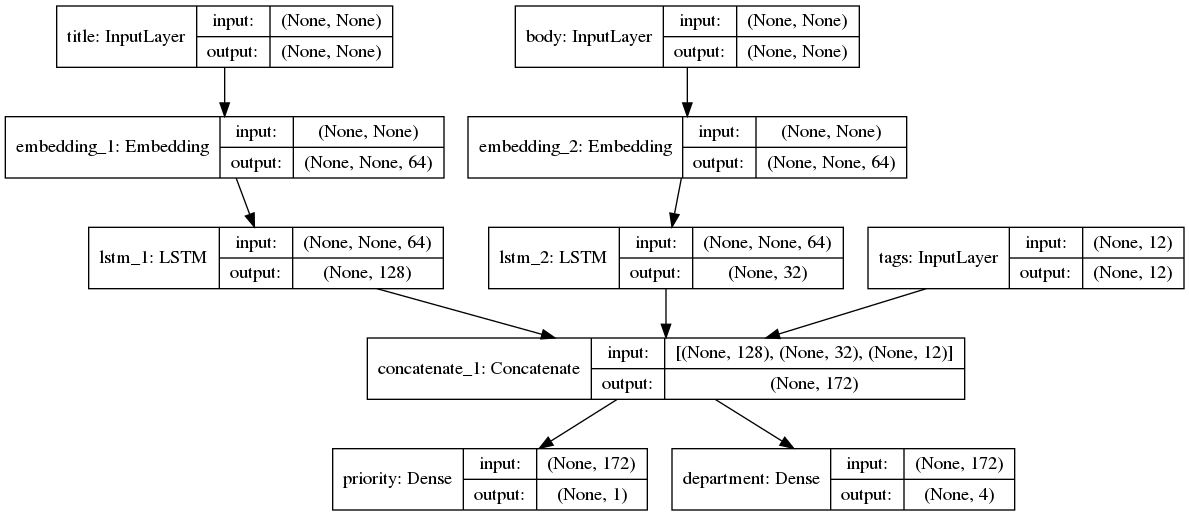

In [38]:
keras.utils.plot_model(model, "multi_in_out.png", show_shapes=True)

In [39]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-4),
    loss={
        'priority': keras.losses.BinaryCrossentropy(from_logits=True),
        'department': keras.losses.CategoricalCrossentropy(from_logits=True)
    },
    loss_weights=[1.0, 0.2]
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [40]:
# dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 10))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')

# dummy target data
priority_targets = np.random.random(size=(1280, 1))
department_targets = np.random.randint(2, size=(1280, num_departs))

model.fit(
    {'title': title_data, 'body': body_data, 'tags': tags_data},
    {'priority': priority_targets, 'department': department_targets},
    epochs=2,
    batch_size=32
)

Epoch 1/2
1280/1280 [==============================] - 1s 931us/step - loss: 1.2686 - priority_loss: 0.6981 - department_loss: 2.8525
Epoch 2/2
1280/1280 [==============================] - 1s 589us/step - loss: 1.2670 - priority_loss: 0.6976 - department_loss: 2.8472


# Residual Connections

In [52]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(64, 3, activation="relu")(inputs)
x = layers.Conv2D(256, 3, activation="relu")(x)
out_1 = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(256, 3, activation="relu", padding="same")(out_1)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
out_2 = layers.add([x, out_1])

x = layers.Conv2D(128, 3, activation="relu", padding="same")(out_2)
x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
out_3 = layers.add([x, out_2])
x = layers.MaxPooling2D(2)(out_3)

x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1028, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 30, 30, 64)   1792        img[0][0]                        
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 28, 28, 256)  147712      conv2d_44[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 14, 14, 256)  0           conv2d_45[0][0]                  
_________________________________________________________________________________________

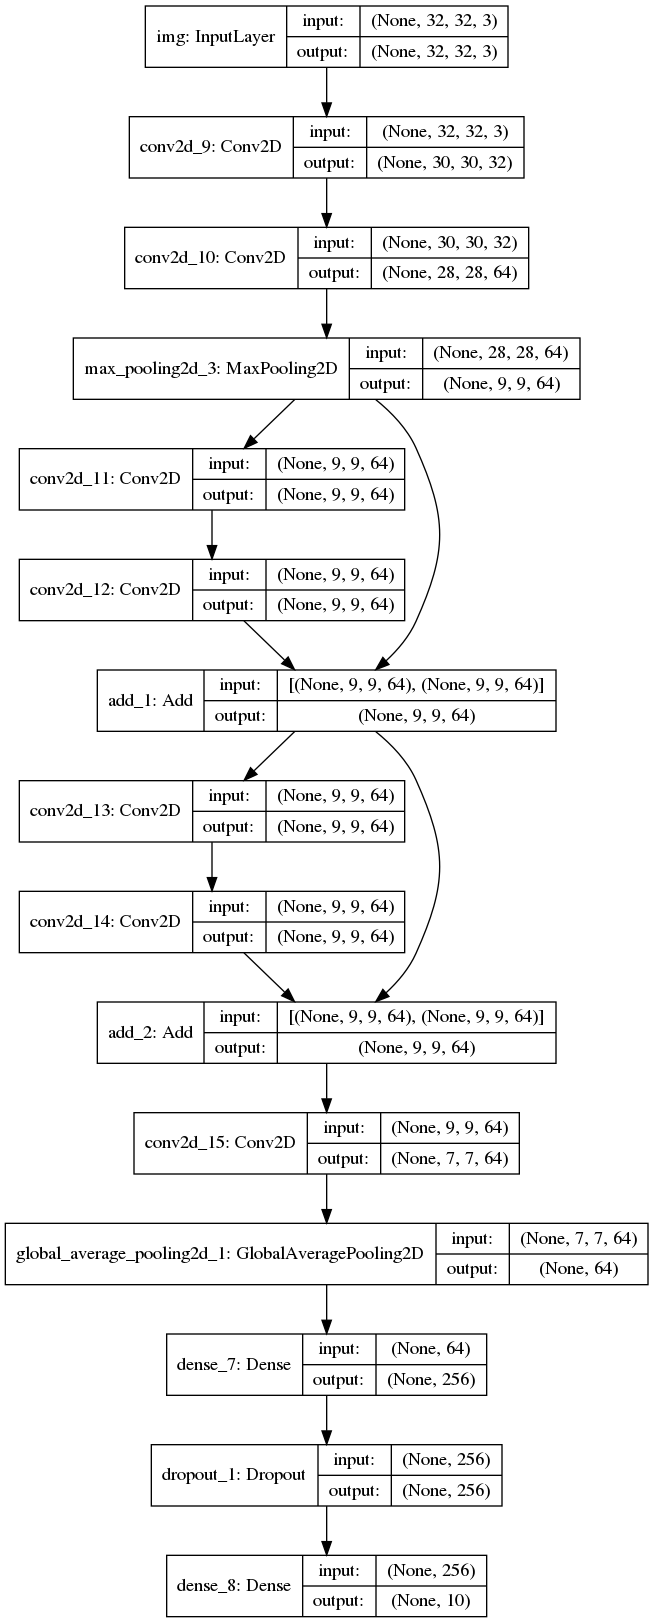

In [42]:
keras.utils.plot_model(model, 'toy_resnet.png', show_shapes=True)

In [53]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [54]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)

In [55]:
callbacks = [EarlyStopping(patience=25, verbose=0)]

In [56]:
model.fit(x_train, y_train, batch_size=64, epochs=250, validation_split=0.2, callbacks=callbacks, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/250
40000/40000 [==============================] - 17s 419us/step - loss: 1.8815 - acc: 0.2729 - val_loss: 1.6210 - val_acc: 0.3977
Epoch 2/250
40000/40000 [==============================] - 16s 399us/step - loss: 1.5315 - acc: 0.4247 - val_loss: 1.3968 - val_acc: 0.4877
Epoch 3/250
40000/40000 [==============================] - 16s 398us/step - loss: 1.3429 - acc: 0.5061 - val_loss: 1.2452 - val_acc: 0.5426
Epoch 4/250
40000/40000 [==============================] - 16s 400us/step - loss: 1.2002 - acc: 0.5635 - val_loss: 1.1338 - val_acc: 0.5928
Epoch 5/250
40000/40000 [==============================] - 16s 400us/step - loss: 1.0947 - acc: 0.6051 - val_loss: 1.0317 - val_acc: 0.6268
Epoch 6/250
40000/40000 [==============================] - 16s 399us/step - loss: 1.0111 - acc: 0.6367 - val_loss: 1.0239 - val_acc: 0.6294
Epoch 7/250
40000/40000 [==============================] - 16s 399us/step - loss: 0.9396 - acc: 0.6630 - val_l

# Shared Layers

In [57]:
shared_embedding = layers.Embedding(1000, 128)

text_input_a = keras.Input(shape=(None,), dtype='int32')
text_input_b = keras.Input(shape=(None,), dtype='int32')

encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

shared_embedding.weights

[<tf.Variable 'embedding_3/embeddings:0' shape=(1000, 128) dtype=float32>]